In [ ]:
Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.


To create this bar chart, you can follow the following steps:

Sort the dataframe in descending order of Very interested.
Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.

As for the chart:


display the percentages above the bars as shown above, and remove the left, top, and right borders.

Once you are satisfied with your chart, please upload a screenshot of your plot. (5 marks)

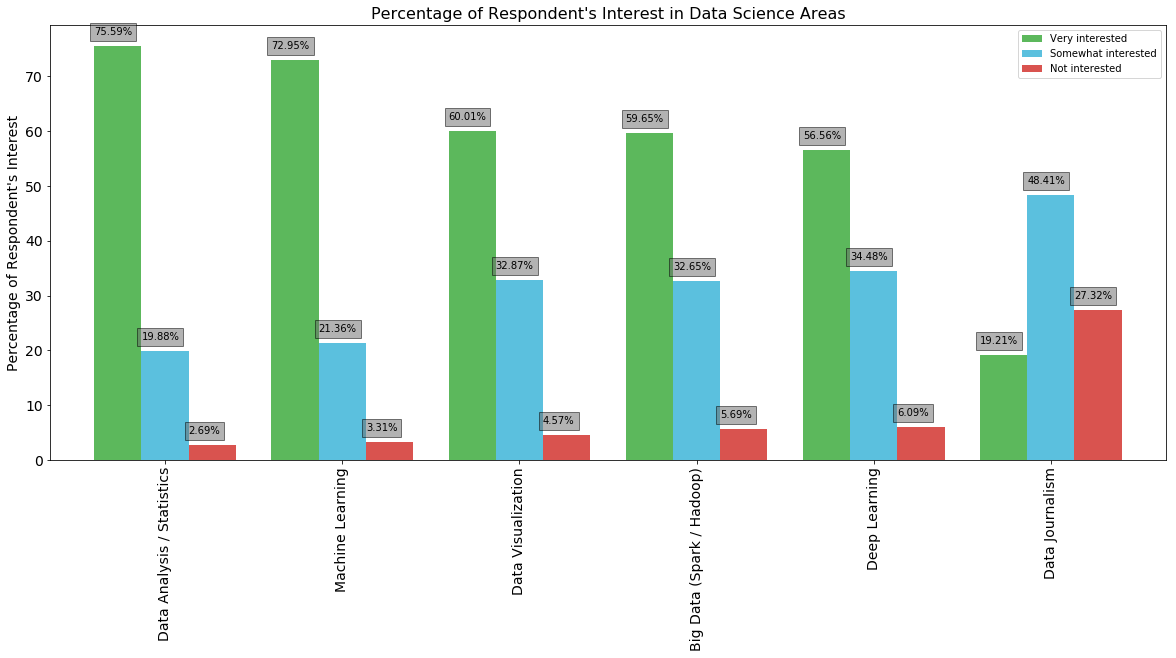

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# https://cocl.us/datascience_survey_data
data = pd.read_csv("https://cocl.us/datascience_survey_data", index_col=0)
# print(data.head())
# data dscribed
# data.describe()

data = data.sort_values("Very interested", ascending=False)
data = ((data * 100) / 2233).round(2)

# plt.bar(data, , width=0.8, bottom=None, *, align='center', data=None, **kwargs)
# ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax = data.plot(kind='bar', 
               width=0.8, figsize=(20, 8), legend=True, fontsize=14, color=['#5cb85c', '#5bc0de', '#d9534f'])
ax.set_title("Percentage of Respondent's Interest in Data Science Areas", fontsize=16)
ax.set_ylabel('Percentage of Respondent\'s Interest', fontsize=14)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+ 2, \
            str(round(i.get_height(), 2))+'%', fontsize=10,
                color='black', bbox=dict(facecolor='dimgrey', alpha=0.5))

plt.show()

In [36]:
data2 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
data2[['Category','PdDistrict']].groupby(['PdDistrict']).count().sort_values('Category')

,Category
PdDistrict,
PARK,8699
RICHMOND,8922
TENDERLOIN,9942
TARAVAL,11325
INGLESIDE,11594
BAYVIEW,14303
CENTRAL,17666
MISSION,19503
NORTHERN,20100


In [6]:
# Task 4
import folium
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

san_geo = 'https://cocl.us/sanfran_geojson'

df = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df.head()
df_select = df.loc[:,["PdDistrict"]]
df_select.head(10)
df_select['count'] = df_select.groupby('PdDistrict')['PdDistrict'].transform('count')
df_select = df_select.drop_duplicates()
df_select
df_final = df_select.iloc[0:9,:]
df_final

# plot it

sf_geo = r'sf.geojson' # geojson file
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12)

sf_map.choropleth(
    geo_data=san_geo,
    data=df_final,
    columns=['PdDistrict', 'count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rates in San Francisco'
)

# display map
sf_map

In [7]:
import requests
import io

r = requests.get("https://cocl.us/sanfran_crime_dataset")
read_me_csv = io.StringIO(r.text)
df2 = pd.read_csv(read_me_csv)

test_me = df2['PdDistrict'].value_counts()
test_me = pd.DataFrame({'district':test_me.index, 'count':test_me.values})
test_me

world_map = folium.Map(location=[37.775421,-122.403405], zoom_start=12)

world_map.choropleth(
    geo_data=san_geo,
    data=test_me,
    columns=['district', 'count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Reported Crimes in San Francisco'
)

# display world map
world_map